In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from ipywidgets import interact
import pickle
import math
plt.rcParams['figure.dpi'] = 200

In [2]:
file_headers = ["/media/user1/Data 2000/soft_robotics_experiments/training_data/round_1/module1_fullext1", #0
                "/media/user1/Data 2000/soft_robotics_experiments/training_data/round_1/module1_fullext2", #1
                "/media/user1/Data 2000/soft_robotics_experiments/training_data/round_1/module1_fullext3", #2
                "/media/user1/Data 2000/soft_robotics_experiments/training_data/round_1/module1_fullext4", #3
                "/media/user1/Data 2000/soft_robotics_experiments/training_data/round_1/module2_fullext1", #4
                "/media/user1/Data 2000/soft_robotics_experiments/training_data/round_1/module2_fullext2", #5
                "/media/user1/Data 2000/soft_robotics_experiments/training_data/round_1/module2_fullext3", #6
                "/media/user1/Data 2000/soft_robotics_experiments/training_data/round_1/module2_fullext4", #7
                "/media/user1/Data 2000/soft_robotics_experiments/training_data/round_1/s_curve1", #8
                "/media/user1/Data 2000/soft_robotics_experiments/training_data/round_1/s_curve2"] #9

CSV_SFX = ".csv"
MARKERS_SFX = "_markers"
POLY_SFX = "_poly"
M10Y = "M10Y"

# Figure: Basic Data
module 2 - left bend - file = module2_fullext1, start = 23, end = 89, time = 43.243-11.405 = 31.838

module 2 - return from left - file = module2_fullext1, start = 397, end = 485, time=233.661-191.292 = 42.369 sec

module 1 - left bend - file = module1_fullext1, start = 24, end = 90, time = 42.678 - 11.39 = 31.288 sec

module 1 - return from left - file = module1_fullext1, start = 281, end = 370, time = 176.278 - 133.641 = 42.637 sec

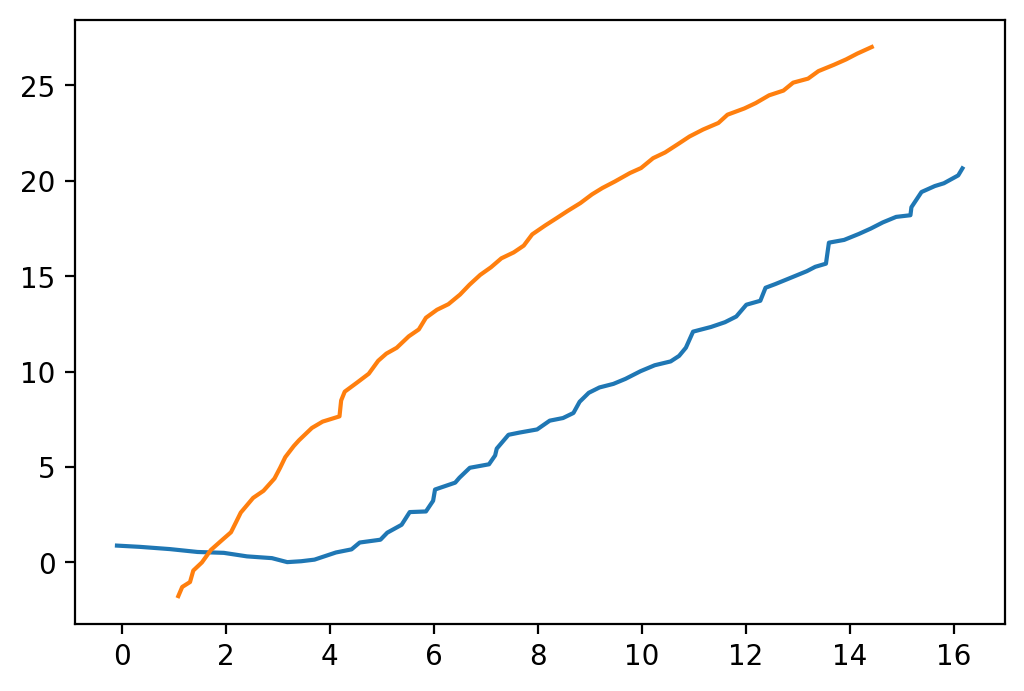

In [3]:
m1_file = file_headers[0]
m2_file = file_headers[4]

m1_data_file = m1_file + CSV_SFX
m1_markers_file = m1_file + MARKERS_SFX + CSV_SFX

m2_data_file = m2_file + CSV_SFX
m2_markers_file = m2_file + MARKERS_SFX + CSV_SFX

m1_data_df = pd.read_csv(m1_data_file)
m1_markers_df = pd.read_csv(m1_markers_file)

m2_data_df = pd.read_csv(m2_data_file)
m2_markers_df = pd.read_csv(m2_markers_file)

m1_act_start = 24
m1_act_end = 90
m1_home_start = 281
m1_home_end = 370

m2_act_start = 23
m2_act_end = 89
m2_home_start = 397
m2_home_end = 485


# Module 1 Home
m1_home_pd = m1_data_df.loc[m1_home_start:m1_home_end, ["M1-PR"]].to_numpy() - m1_data_df.loc[m1_home_start:m1_home_end, ["M1-PL"]].to_numpy()

m1_home_time = m1_data_df.loc[m1_home_start:m1_home_end, ["TIME"]]
m1_home_time = m1_home_time - int(m1_home_time.iloc[0,:])

m1_home_vectors = m1_markers_df.loc[m1_home_start:m1_home_end, ["M5X", "M5Y"]].to_numpy()
#print(m1_home_vectors)
m1_home_theta = []
for v in m1_home_vectors:
    ratio = abs(v[0] / v[1])
    theta = math.degrees(math.atan(ratio))
    m1_home_theta.append(theta)
#print(len(m1_home_theta))

# Module 1 Act
m1_act_pd = m1_data_df.loc[m1_act_start:m1_act_end, ["M1-PR"]].to_numpy() - m1_data_df.loc[m1_act_start:m1_act_end, ["M1-PL"]].to_numpy()

m1_act_time = m1_data_df.loc[m1_act_start:m1_act_end, ["TIME"]]
m1_act_time = m1_act_time - int(m1_act_time.iloc[0,:])

m1_act_vectors = m1_markers_df.loc[m1_act_start:m1_act_end, ["M5X", "M5Y"]].to_numpy()
m1_act_theta = []
for v in m1_act_vectors:
    ratio = abs(v[0] / v[1])
    theta = math.degrees(math.atan(ratio))
    m1_act_theta.append(theta)

# Module 2 Home
m2_home_pd = m2_data_df.loc[m2_home_start:m2_home_end, ["M2-PR"]].to_numpy() - m2_data_df.loc[m2_home_start:m2_home_end, ["M2-PL"]].to_numpy() 

m2_home_time = m2_data_df.loc[m2_home_start:m2_home_end, ["TIME"]]
m2_home_time = m2_home_time - int(m2_home_time.iloc[0,:])


m2_home_vectors = m2_markers_df.loc[m2_home_start:m2_home_end, ["M10X", "M10Y"]].to_numpy() - m2_markers_df.loc[m2_home_start:m2_home_end, ["M5X", "M5Y"]].to_numpy()
m2_home_theta = []
for v in m2_home_vectors:
    ratio = abs(v[0] / v[1])
    theta = math.degrees(math.atan(ratio))
    m2_home_theta.append(theta)
    
# Module 2 Act
m2_act_pd = m2_data_df.loc[m2_act_start:m2_act_end, ["M2-PR"]].to_numpy() - m2_data_df.loc[m2_act_start:m2_act_end, ["M2-PL"]].to_numpy() 

m2_act_time = m2_data_df.loc[m2_act_start:m2_act_end, ["TIME"]]
m2_act_time = m2_act_time - int(m2_act_time.iloc[0,:])

m2_act_vectors = m2_markers_df.loc[m2_act_start:m2_act_end, ["M10X", "M10Y"]].to_numpy() - m2_markers_df.loc[m2_act_start:m2_act_end, ["M5X", "M5Y"]].to_numpy()
m2_act_theta = []
for v in m2_act_vectors:
    ratio = -1.0 * (v[0] / v[1])
    theta = math.degrees(math.atan(ratio))
    m2_act_theta.append(theta)


plt.plot(m1_act_pd, m1_act_theta)
plt.plot(m2_act_pd, m2_act_theta)

# data_file = header + CSV_SFX
# marker_file = header + MARKERS_SFX + CSV_SFX
# poly_file = header + POLY_SFX + CSV_SFX

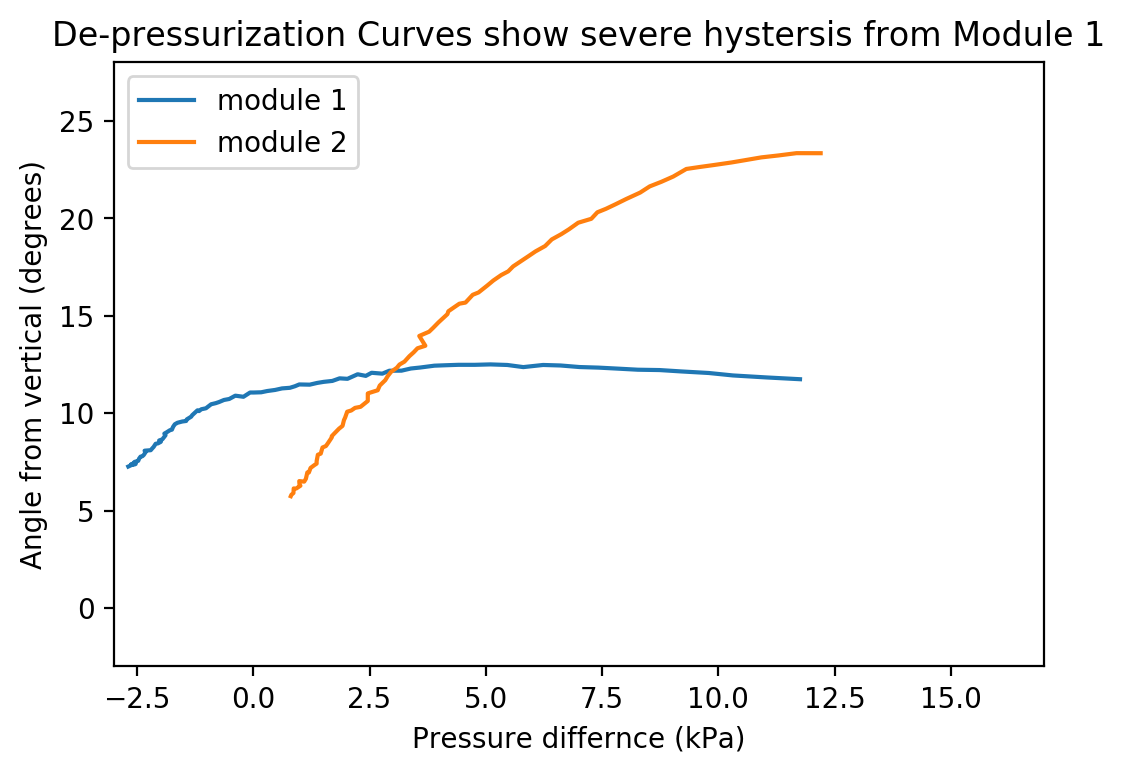

In [18]:
plt.plot(m1_home_pd, m1_home_theta, label="module 1")
plt.plot(m2_home_pd, m2_home_theta, label="module 2")
plt.xlim([-3,17])
plt.ylim([-3,28])
# plt.grid(True)
plt.title("De-pressurization Curves show severe hystersis from Module 1")
plt.xlabel("Pressure differnce (kPa)")
plt.ylabel("Angle from vertical (degrees)")
plt.legend()

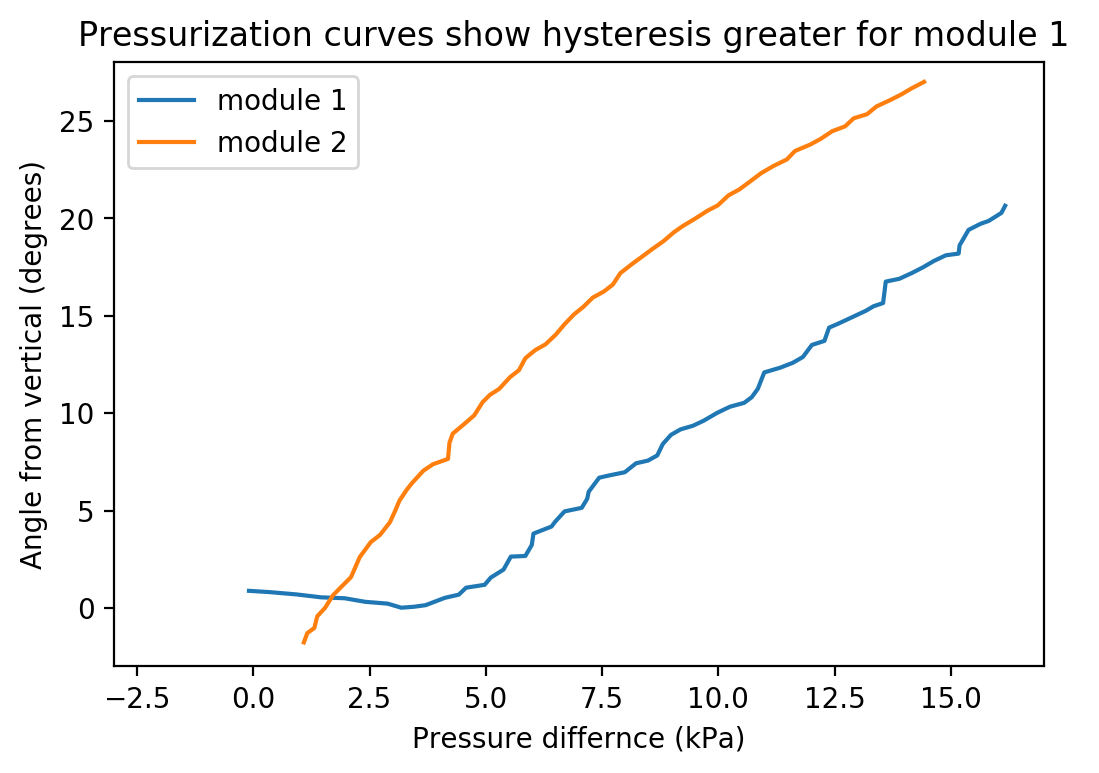

In [19]:
plt.plot(m1_act_pd, m1_act_theta, label="module 1")
plt.plot(m2_act_pd, m2_act_theta, label="module 2")
plt.xlim([-3,17])
plt.ylim([-3,28])
# plt.grid(True)
plt.title("Pressurization curves show hysteresis greater for module 1 ")
plt.xlabel("Pressure differnce (kPa)")
plt.ylabel("Angle from vertical (degrees)")
plt.legend()